Further exercises in python

Sure, here's a text processing exercise for you:

# Problem statement: Text Analysis

Suppose you are given a large text document and you want to find out the following:

1. Total number of words in the document.
2. The 10 most common words and their frequencies.
3. The 10 most common 2-word phrases (also known as bigrams) and their frequencies.

You can use the following text to start with:

```
text = """
In computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals. More specifically, Kaplan and Haenlein define AI as “a system’s ability to correctly interpret external data, to learn from such data, and to use those learnings to achieve specific goals and tasks through flexible adaptation”. Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".
"""
```

You might find the following Python modules helpful:

- `re`: for regular expression operations, useful for text processing.
- `collections`: for high-performance container datatypes, like `Counter` which can help with counting words or bigrams.

Remember to consider edge cases such as punctuation and case sensitivity. Try to structure your solution into functions to promote reusability and readability.

**Bonus:** Implement a function that takes in an integer `n` and returns the `n` most common `n`-word phrases (also known as n-grams) and their frequencies. For example, if `n` is 3, it should return the most common 3-word phrases and their frequencies.

In [40]:
text = """
In computer science, artificial intelligence (AI), sometimes called machine intelligence, 
is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals. 
Leading AI textbooks define the field as the study of "intelligent agents": 
any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals. 
More specifically, Kaplan and Haenlein define AI as “a system’s ability to correctly interpret external data, 
to learn from such data, and to use those learnings to achieve specific goals and tasks through flexible adaptation”. 
Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" 
functions that humans associate with the human mind, such as "learning" and "problem solving".
"""

from collections import Counter
import re

clean_text = re.sub('[^A-Za-z0-9 ]+', '', text)
text_lst = clean_text.lower().split()

def count_words(lst):
    return len(lst)

q1 = count_words(text_lst)

def mostcommon(lst, n) -> list:
    q2 = []
    q2 = Counter(lst)
    return [(word, count) for word, count in q2.most_common(n)]

q2 = mostcommon(text_lst, 10)

def mostbigram(lst, n) -> list:
    temp = []
    for i in range(len(text_lst)-1):
        q3 = text_lst[i] + ' ' + text_lst[i+1]
        temp.append(q3)
    return mostcommon(temp, n)
    
q3 = mostbigram(text_lst, 5)

print(f'The total number of words is {q1}, \
      \n\nThe 10 most common words are {q2}, \
      \n\nAnd the 10 most common bigrams are {q3}')

The total number of words is 119,       

The 10 most common words are [('and', 6), ('intelligence', 5), ('the', 5), ('to', 5), ('that', 4), ('ai', 3), ('as', 3), ('its', 3), ('artificial', 2), ('is', 2)],       

And the 10 most common bigrams are [('artificial intelligence', 2), ('intelligence is', 2), ('in computer', 1), ('computer science', 1), ('science artificial', 1)]


In [ ]:
# re bonus
def count_ngrams(text_lst, n):
    ngrams = zip(*[text_lst[i:] for i in range(n)]) # this is next level
    return Counter(ngrams).most_common(3)

print(count_ngrams(text_lst, 3))

[(('in', 'computer', 'science'), 1), (('computer', 'science', 'artificial'), 1), (('science', 'artificial', 'intelligence'), 1)]


here is an exercise that involves the use of classes:

## Problem Statement:

You are to create a simple simulation of a library system. The system should be able to keep track of which books are in the library and who has borrowed them. Here are the requirements:

1. Create a `Book` class. Each book should have the following properties:
    - `title`: the title of the book
    - `author`: the author of the book
    - `available`: a boolean indicating whether the book is currently available in the library or not.

2. Create a `User` class. Each user should have the following properties:
    - `name`: the name of the user
    - `books`: a list of books that the user has currently borrowed from the library.

   And the following methods:
    - `borrow_book(book: Book)`: If the book is available in the library, this method should add the book to the user's `books` list, and set the book's `available` property to `False`. If the book is not available, the method should print a message stating that the book is not available.
    - `return_book(book: Book)`: This method should remove the book from the user's `books` list, and set the book's `available` property to `True`.

3. Create a `Library` class. The library should have the following properties:
    - `books`: a list of all the books in the library.

   And the following methods:
    - `add_book(book: Book)`: This method should add a book to the library's list of books.
    - `remove_book(book: Book)`: This method should remove a book from the library's list of books.

Test your classes by creating instances of `Book`, `User`, and `Library`, and call the methods to make sure they behave as expected. Make sure to handle cases where a user tries to borrow a book that is not available, or return a book that they haven't borrowed.

## Bonus:

1. Add the ability to search for a book by title or author in the `Library` class.
2. Add a `due_date` property to the `Book` class, to keep track of when borrowed books are due to be returned.
3. Add a `fine` property to the `User` class, which increases if a book is not returned by its due date.

In [ ]:
import datetime

class Book:
    def __init__(self, title, author, available):
        self.title = title
        self.author = author
        self.available = available
        self.due_date = None
            
    def set_due_date(self):
        self.due_date = datetime.datetime.now() + datetime.timedelta(weeks=2)

    def reset_due_date(self):
        self.due_date = None
                
class User:
    def __init__(self, name):
        self.name = name
        self.borrowed_books = []
        self.fine = 0
        
    def borrow_book(self, book: Book):
        if book.available:                           # book is an object of the class Book
            self.borrowed_books.append(book)
            book.set_due_date()
            book.available = False
        else: print(f"This book: {book.title} isn't available. It is due back on {book.due_date}")

    def return_book(self, book: Book):
        self.borrowed_books.remove(book)
        self.calculate_fine()
        book.reset_due_date()
        book.available = True
                        
    def display_books(self):
        for book in self.borrowed_books:
            print(f'Title: {book.title}, Author: {book.author}, Available: {book.available}, Due date: {book.due_date}')

    def calculate_fine(self):
        fine = 0
        for book in self.borrowed_books:
            if book.due_date < datetime.datetime.now():  
                difference = datetime.datetime.now() - book.due_date
                days_overdue = difference.days                        # note that this is where the datetime format is parsed
                fine += days_overdue  # increase fine by the number of days overdue
        return fine
                        
class Library:
    def __init__(self):
        self.books = [] 
        
    def add_book(self, book: Book):
        self.books.append(book)
        
    def remove_book(self, book: Book):
        self.books.remove(book)
    
    def display_books(self):
        for book in self.books:
            print(f'Title: {book.title}, Author: {book.author}, Available: {book.available}, Due date: {book.due_date}')
            
    def search(self, keyword):
        for book in self.books:
            if keyword in book.title or keyword in book.author:
                print(f'Title: {book.title}, Author: {book.author}, Available: {book.available}')

In [ ]:
book1 = Book('Vluchtlijnen', 'Johannes VC', True)
book2 = Book('de antichrist', 'Nietzsche', True)

library1 = Library()

library1.add_book(book1)
library1.add_book(book2)

library1.display_books()

Title: Vluchtlijnen, Author: Johannes VC, Available: True, Due date: None
Title: de antichrist, Author: Nietzsche, Available: True, Due date: None


In [ ]:
user1 = User('Rosy')
user1.borrow_book(book1)

In [ ]:
user1.display_books()

Title: Vluchtlijnen, Author: Johannes VC, Available: False, Due date: 2023-07-05 10:53:27.221232


In [ ]:
user1.return_book(book1)
book1.available, user1.display_books()

(True, None)

In [ ]:
library1.display_books()

Title: Vluchtlijnen, Author: Johannes VC, Available: True, Due date: None
Title: de antichrist, Author: Nietzsche, Available: True, Due date: None


In [ ]:
user2 = User('Louise')
user2.borrow_book(book2)
book2.available, user2.display_books()

Title: de antichrist, Author: Nietzsche, Available: False, Due date: 2023-07-05 10:53:27.283577


(False, None)

In [ ]:
user2.return_book(book2)
book2.available

True

In [ ]:
user2.borrow_book(book1)
user1.borrow_book(book1)

This book: Vluchtlijnen isn't available. It is due back on 2023-07-05 10:53:27.314494


In [ ]:
library1.search('Nietzsche')

Title: de antichrist, Author: Nietzsche, Available: True


Sure, here's a problem that requires the use of classes and involves textual analysis. 

# Problem Statement

You are to create a `TextAnalyzer` class which will perform a variety of operations on a given text.

Your class should have the following methods:

- `__init__(self, text)`: This method should take in a string `text` and initialize a `TextAnalyzer` object.

- `word_count(self)`: This method should return the total count of words in the text. A word is defined as a series of characters separated by white spaces.

- `char_count(self, include_spaces=True)`: This method should return the total count of characters in the text. If `include_spaces` is `False`, it should not count white spaces.

- `most_common_word(self)`: This method should return the most common word in the text. If there is a tie, return any of the most common words.

- `sentence_count(self)`: This method should return the total count of sentences in the text. You can assume that a sentence is ended by a period (`.`), exclamation mark (`!`) or question mark (`?`).

- `avg_word_length(self)`: This method should return the average length of words in the text.

Remember to handle edge cases, such as an empty string, and to document any assumptions you make.

## Example

Here is how the `TextAnalyzer` class should work:

```python
text = "Hello world! This is a test text. This text is for testing the TextAnalyzer class. Testing, testing, 1, 2, 3."

analyzer = TextAnalyzer(text)

print(analyzer.word_count())  # Output: 15
print(analyzer.char_count())  # Output: 90
print(analyzer.char_count(include_spaces=False))  # Output: 72
print(analyzer.most_common_word())  # Output: "testing"
print(analyzer.sentence_count())  # Output: 3
print(analyzer.avg_word_length())  # Output: 4.8
```

## Bonus

As a bonus task, add a method `sentiment_analysis(self)` to your `TextAnalyzer` class that performs a very basic form of sentiment analysis on the text. This method should return a positive number if the text has more positive words than negative, a negative number if it has more negative words than positive, and zero if it has an equal number of positive and negative words.

You can use the following lists of positive and negative words for this task:

```python
positive_words = ["good", "happy", "great", "awesome", "positive", "love", "exciting", "excellent"]
negative_words = ["bad", "sad", "angry", "awful", "negative", "hate", "boring", "terrible"]
```

For simplicity, you can assume that the sentiment of a word is not affected by its context and that all words not in these lists are neutral.

**Note:** This is a very simplistic form of sentiment analysis and is not reflective of how sentiment analysis is typically performed in a real-world scenario.

In [184]:
import re

class TextAnalyzer:
    
    def __init__(self, text: str):
        self.text = text
        
    def word_count(self): 
        """This method should return the total count of words in the text. A word is defined as a series of characters separated by white spaces."""
        text = self.text.lower()

        text = re.sub(r'[^a-z ]', '', text)
        text_list = text.split()

        # text_list = list(set(text_list))
        return len(text_list)
    

    def char_count(self, include_spaces=True): 
        """This method should return the total count of characters in the text. If include_spaces is False, it should not count white spaces."""
        alpha, spaces = 0, 0
        
        alpha = sum(c.isalnum() for c in self.text)
             
        if include_spaces == False: 
            return alpha
        if include_spaces == True: 
            return alpha + sum(c.isspace() for c in self.text)


    def most_common_word(self): 
        """This method should return the most common word in the text. If there is a tie, return any of the most common words."""
        words = {}
        text = re.sub(r"[^A-Za-z ]+", '', self.text.lower())
        text_list = text.split()

        for word in text_list:
            words[word] = words.get(word,0) + 1
            
        words_sorted = sorted(words.items(), key=lambda x: x[1], reverse=True)

        return words_sorted[0][0]

    def sentence_count(self): 
        """This method should return the total count of sentences in the text. You can assume that a sentence is ended by a period (.), exclamation mark (!) or question mark (?)."""
        sentence_count = 0
        sep = ['.', '?', '!']
        
        for char in self.text:
            if char in sep:
                sentence_count += 1
        
        return sentence_count # or instead of the above len([c for c in text if c in ['.', '?', '!']]) or len(re.findall(r'[.!?]', self.text))

    
    def avg_word_length(self): 
        """This method should return the average length of words in the text."""
        words = []
        text = re.sub(r"[^A-Za-z ]+", '', self.text.lower())
        text_list = text.split()

        for word in text_list:
            words.append(len(word))
        avg = sum(words) / len(words)    
        return f'{avg:.2f}'
        
        
text = "Hello world! This is a test text. This text is for testing the TextAnalyzer class. Testing, testing, 1, 2, 3."
analyzer = TextAnalyzer(text)

In [187]:
print(analyzer.word_count())  # Output: 15
print(analyzer.char_count())  # Output: 90
print(analyzer.char_count(include_spaces=False))  # Output: 72
print(analyzer.most_common_word())  # Output: "testing"
print(analyzer.sentence_count())  # Output: 3
print(analyzer.avg_word_length())  # Output: 4.8

17
101
82
testing
4
4.65


## some suggestions after putting the results back into chatgtp:

In [175]:
len(re.findall(r'[.!?]', text)) # as a quicker way to count sentences: it just finds all punctuation with regex

4

In [183]:
words = re.findall(r'\w+', text.lower()) # similarly, instead of split(), it suggests to use this regex: (\b is boundary and) \w+ is word
words                                    # this produces a list

['hello',
 'world',
 'this',
 'is',
 'a',
 'test',
 'text',
 'this',
 'text',
 'is',
 'for',
 'testing',
 'the',
 'textanalyzer',
 'class',
 'testing',
 'testing',
 '1',
 '2',
 '3']

Side note: Why `r'\b\w+\b'`? 

By using `\b\w+\b`, you ensure that you're only matching complete words. The `\b` word boundary markers mean that the pattern will only match sequences of word characters that are not immediately followed or preceded by another word character. This is a more precise way of extracting words from a text.

For example, if you have the string "Hello,World_123!", `\w+` would match "Hello", "World_123", but `\b\w+\b` would match "Hello" and "World_123" as separate words, which is usually the desired outcome when analyzing text.

So, the use of `\b\w+\b` is to ensure that the regular expression is capturing whole words, rather than parts of words or words that are part of a larger sequence of characters.

# Problem Statement:

Create a Python class called `DataAnalyzer` that will perform various data analysis tasks on a dataset. The dataset is a list of dictionaries, where each dictionary represents a record with various attributes. The attributes could be numerical, categorical, or boolean. 

For instance, a data record could look like this:

```python
data = [
    {"name": "John", "age": 25, "job": "Engineer", "city": "San Francisco", "is_married": False},
    {"name": "Lisa", "age": 30, "job": "Doctor", "city": "New York", "is_married": True},
    {"name": "Mark", "age": 35, "job": "Artist", "city": "Los Angeles", "is_married": False},
    {"name": "Sara", "age": 40, "job": "Engineer", "city": "San Francisco", "is_married": True},
    #...and so on
]
```

Your `DataAnalyzer` class should include the following methods:

1. `__init__(self, data)`: Initialize the `DataAnalyzer` with the provided data.

2. `filter_records(self, attribute, value)`: This method should return all records for which the given attribute matches the given value. For instance, you could use this to get all records where `job` is `"Engineer"`.

3. `average_age(self)`: This method should return the average age of all records in the data.

4. `most_common_job(self)`: This method should return the most common job among all records.

5. `percentage_married(self)`: This method should return the percentage of records where `is_married` is `True`.

6. `city_count(self)`: This method should return a dictionary where the keys are the different cities present in the records and the values are the number of records from each city.

7. `age_histogram(self, bins)`: This method should return a histogram of ages, with the number of bins specified as an argument.

Implement the `DataAnalyzer` class with the methods described above. You may use any additional libraries or modules as needed.

Note: This exercise assumes that you have some familiarity with the concepts of data analysis. If not, you may need to do some research to understand how to implement some of these methods. 

For the `age_histogram` method, you don't need to plot a graphical histogram, but instead return a list of lists where each sub-list contains two values: the age bin and the count of records within that age bin. For example, if `bins = 5`, and the ages range from 20 to 40, the output could look something like this:

```python
[[20, 25, 5], [25, 30, 10], [30, 35, 7], [35, 40, 3]]
```

In this example, there are 5 people aged 20-25, 10 people aged 25-30, and so on.

In [193]:
data = [
    {"name": "John", "age": 25, "job": "Engineer", "city": "San Francisco", "is_married": False},
    {"name": "Lisa", "age": 30, "job": "Doctor", "city": "New York", "is_married": True},
    {"name": "Mark", "age": 35, "job": "Artist", "city": "Los Angeles", "is_married": False},
    {"name": "Sara", "age": 40, "job": "Engineer", "city": "San Francisco", "is_married": True},
    {"name": "Paul", "age": 36, "job": "Teacher", "city": "Austin", "is_married": False},
    {"name": "Emma", "age": 29, "job": "Engineer", "city": "Seattle", "is_married": True},
    {"name": "Grace", "age": 34, "job": "Doctor", "city": "New York", "is_married": False},
    {"name": "James", "age": 45, "job": "Artist", "city": "Los Angeles", "is_married": True},
    {"name": "Anna", "age": 31, "job": "Engineer", "city": "San Francisco", "is_married": False},
    {"name": "David", "age": 39, "job": "Teacher", "city": "Austin", "is_married": True},
    {"name": "Sophia", "age": 28, "job": "Engineer", "city": "Seattle", "is_married": False},
    {"name": "Jackson", "age": 33, "job": "Doctor", "city": "New York", "is_married": True},
    {"name": "Olivia", "age": 42, "job": "Artist", "city": "Los Angeles", "is_married": False},
    {"name": "Liam", "age": 37, "job": "Engineer", "city": "San Francisco", "is_married": True},
    {"name": "Mia", "age": 27, "job": "Teacher", "city": "Austin", "is_married": False},
    {"name": "Lucas", "age": 38, "job": "Engineer", "city": "Seattle", "is_married": True},
    {"name": "Ella", "age": 33, "job": "Doctor", "city": "New York", "is_married": False},
    {"name": "Mason", "age": 41, "job": "Artist", "city": "Los Angeles", "is_married": True},
    {"name": "Ava", "age": 32, "job": "Engineer", "city": "San Francisco", "is_married": False},
    {"name": "Logan", "age": 39, "job": "Teacher", "city": "Austin", "is_married": True},
]


In [276]:
from collections import Counter

class DataAnalyser:
    def __init__(self, data: list):
        self.data = data
        
    def filter_records(self, attribute, value): 
        """This method should return all records for which the given attribute matches the given value. For instance, you could use this to get all records where `job` is `"Engineer"`."""

        return [item for item in self.data if item[attribute] == value]

    def average_age(self): 
        """This method should return the average age of all records in the data."""
        ages = [person['age'] for person in self.data]
        return sum(ages) / len(ages)
    
    def most_common_job(self):
        """This method should return the most common job among all records."""
        jobs_count = Counter([person['job'] for person in data])
        return sorted(jobs_count.items(), key=lambda x:x[1], reverse=True)[0][0]
    
    def percentage_married(self): 
        """This method should return the percentage of records where `is_married` is `True`."""
        civil_status = [person['is_married'] for person in self.data]

        return sum(m for m in civil_status if m is True) / len(civil_status)
    
    def city_count(self): 
        """This method should return a dictionary where the keys are the different cities present in the records and the values are the number of records from each city."""
        return Counter([person['city'] for person in self.data])
    
    def age_histogram(self, bins): 
        """This method should return a histogram of ages, with the number of bins specified as an argument."""
        bins_ = []
        ages = [person['age'] for person in self.data]
        for age in ages:
            bin = min(age // 5 * bins, 45)
            bins_.append(bin)
        count_dict = Counter(bins_)    
        return [[k, k+5, v] for k, v in count_dict.items()]

In [277]:
analyser = DataAnalyser(data)

In [230]:
analyser.filter_records(attribute='job', value='Engineer')

[{'name': 'John',
  'age': 25,
  'job': 'Engineer',
  'city': 'San Francisco',
  'is_married': False},
 {'name': 'Sara',
  'age': 40,
  'job': 'Engineer',
  'city': 'San Francisco',
  'is_married': True},
 {'name': 'Emma',
  'age': 29,
  'job': 'Engineer',
  'city': 'Seattle',
  'is_married': True},
 {'name': 'Anna',
  'age': 31,
  'job': 'Engineer',
  'city': 'San Francisco',
  'is_married': False},
 {'name': 'Sophia',
  'age': 28,
  'job': 'Engineer',
  'city': 'Seattle',
  'is_married': False},
 {'name': 'Liam',
  'age': 37,
  'job': 'Engineer',
  'city': 'San Francisco',
  'is_married': True},
 {'name': 'Lucas',
  'age': 38,
  'job': 'Engineer',
  'city': 'Seattle',
  'is_married': True},
 {'name': 'Ava',
  'age': 32,
  'job': 'Engineer',
  'city': 'San Francisco',
  'is_married': False}]

In [236]:
analyser.average_age()

34.7

In [242]:
analyser.most_common_job()

'Engineer'

In [278]:
analyser.age_histogram(5)

[[25, 30, 4], [30, 35, 6], [35, 40, 6], [40, 45, 3], [45, 50, 1]]

## Aside on histograms

For the bins, chatgpt suggests the following as to create bins based on the range of ages present in the data and the bins argument.

In [305]:
import numpy as np

def age_histogram(self, bins=4): 
    """This method should return a histogram of ages, with the number of bins specified as an argument."""
    ages = [person['age'] for person in data]
    hist, bin_edges = np.histogram(ages, bins=bins)
    return {tuple(bin_edges[i:i+2]): hist[i] for i in range(len(hist))}

age_histogram(data)

{(25.0, 30.0): 4, (30.0, 35.0): 6, (35.0, 40.0): 6, (40.0, 45.0): 4}

In [335]:
import numpy as np
hist, bin_edges = np.histogram(ages, bins=4)
hist, bin_edges

(array([4, 6, 6, 4], dtype=int64), array([25., 30., 35., 40., 45.]))

In [330]:
# {tuple(bin_edges[i:i+2]): hist[i] for i in range(len(hist))}
a = list(bin_edges[0:0+2]) + [hist[0]]
a

[25.0, 30.0, 4]

(array([3., 4., 5., 5., 3.]),
 array([25., 29., 33., 37., 41., 45.]),
 <BarContainer object of 5 artists>)

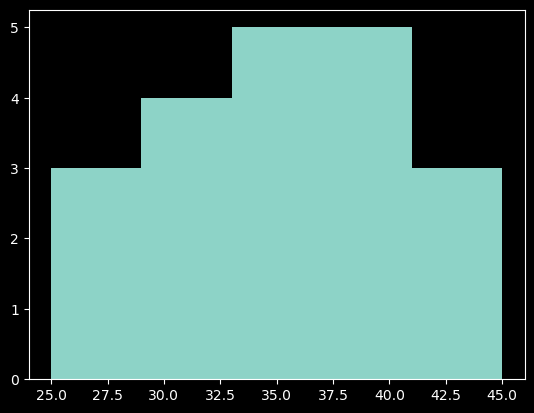

In [347]:
import matplotlib.pyplot as plt

plt.hist(ages, bins=5)

### Going back to the book's approach:

In [294]:
Counter(min(age // 5 * 5, 45) for age in ages) 

Counter({25: 4, 30: 6, 35: 6, 40: 3, 45: 1})

In [290]:
min(17 // 5 * 5, 45) # first divides (without decimals), then multiplies by 5. This drops everything between 15 and 20 as that is between 3 and 4 times 5 (a decimal)

10

Note that 
- 17 is the datapoint
- 5 is the bucket size
- 45 is the max

In [351]:
import math
math.floor(17 / 5) * 5 # does the same

15

In [291]:
min(10, 15, 45)

10

The book often used min() and max() functions

In [354]:
ages = [person['age'] for person in data]
difference = max(ages) - min(ages)
f'So I should start at {min(ages)} and end at {max(ages)} while dividing the difference {difference} with the bins'

'So I should start at 25 and end at 45 while dividing the difference 20 with the bins'

Sure, here is a data analysis exercise that uses numpy, matplotlib, seaborn, and pandas:

---

# Exercise: Analyzing and Visualizing a Weather Dataset

A weather station has collected data over the past year and stored it in a CSV file. Each row in the file represents a single day. The columns are:

1. `date`: The date in "YYYY-MM-DD" format.
2. `temperature`: The average temperature on that day, in degrees Celsius.
3. `rainfall`: The amount of rainfall on that day, in millimeters.
4. `wind_speed`: The average wind speed on that day, in kilometers per hour.

Your tasks are:

1. Load the data into a pandas DataFrame.

2. Clean the data: Check for missing or anomalous values and handle them in a way that seems appropriate.

3. Compute descriptive statistics: For each column, compute the mean, standard deviation, minimum, and maximum.

4. Analyze trends: 

    a. Compute the average temperature, rainfall, and wind speed for each month. 

    b. Identify the hottest, wettest, and windiest months.

5. Visualize the data:

    a. Plot a histogram of the temperature, rainfall, and wind speed distributions.

    b. Plot a line graph of temperature, rainfall, and wind speed over time.

    c. Plot a scatter matrix (pair plot) of the temperature, rainfall, and wind speed columns.

Remember to label all of your figures and axes, and to use appropriate scales and ticks. 

6. Hypothesis Testing:

    a. Test if rainfall affects temperature. (Hint: You can use a t-test to compare the temperature on days with and without rainfall.)

    b. Test if wind speed affects rainfall. (Hint: You could use a chi-squared test for independence to compare the distributions of wind speed on days with and without rainfall.)

---

**Note**: This exercise is theoretical since no actual data file is provided. However, it's a good practice for understanding the process of data analysis using these libraries. You can use any weather dataset available online which follows the same format as mentioned above.

In [14]:
import csv
csv_file = []
with open('data/3370448.csv', 'r') as f:    
    for row in csv.DictReader(f, delimiter=','):
        csv_file.append(row)
        
csv_file

[{'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-01',
  'PRCP': '0.13',
  'SNWD': '',
  'TAVG': '55',
  'TMAX': '',
  'TMIN': ''},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-02',
  'PRCP': '0.24',
  'SNWD': '',
  'TAVG': '49',
  'TMAX': '',
  'TMIN': ''},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-03',
  'PRCP': '0.02',
  'SNWD': '',
  'TAVG': '44',
  'TMAX': '',
  'TMIN': '38'},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-04',
  'PRCP': '0.19',
  'SNWD': '',
  'TAVG': '52',
  'TMAX': '54',
  'TMIN': '47'},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-05',
  'PRCP': '0.05',
  'SNWD': '',
  'TAVG': '51',
  'TMAX': '53',
  'TMIN': ''},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-06',
  'PRCP': '0.04',
  'SNWD': '',
  'TAVG': '51',
  'TMAX': '52',
  'TMIN': '50'},
 {'STATION': 'BE000006447',
  'NAME': 'UCCLE, BE',
  'DATE': '2023-01-07',
 

easier - directly into pandas with .read_csv()

In [124]:
import pandas as pd

%time 
df = pd.read_csv('data/3370448.csv')
df

CPU times: total: 0 ns
Wall time: 0 ns


,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,BE000006447,"UCCLE, BE",2023-01-01,0.13,NaN,55,NaN,NaN
1,BE000006447,"UCCLE, BE",2023-01-02,0.24,NaN,49,NaN,NaN
2,BE000006447,"UCCLE, BE",2023-01-03,0.02,NaN,44,NaN,38.0
3,BE000006447,"UCCLE, BE",2023-01-04,0.19,NaN,52,54.0,47.0
4,BE000006447,"UCCLE, BE",2023-01-05,0.05,NaN,51,53.0,NaN
...,...,...,...,...,...,...,...,...
164,BE000006447,"UCCLE, BE",2023-06-14,0.00,NaN,72,80.0,62.0
165,BE000006447,"UCCLE, BE",2023-06-15,0.00,NaN,69,80.0,58.0
166,BE000006447,"UCCLE, BE",2023-06-16,0.00,NaN,72,81.0,58.0
167,BE000006447,"UCCLE, BE",2023-06-17,0.00,NaN,71,82.0,59.0


In [128]:
!dir data\3370448.csv

 Volume in drive C is Windows
 Volume Serial Number is 3C7E-440D

 Directory of c:\_sandbox\Jupyter\data

22/06/2023  15:57            10,194 3370448.csv
               1 File(s)         10,194 bytes
               0 Dir(s)  24,877,301,760 bytes free


In [123]:
df.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  169 non-null    object 
 1   NAME     169 non-null    object 
 2   DATE     169 non-null    object 
 3   PRCP     169 non-null    float64
 4   SNWD     1 non-null      float64
 5   TAVG     169 non-null    int64  
 6   TMAX     142 non-null    float64
 7   TMIN     109 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 10.7+ KB


In [132]:
df['DATE'] = df['DATE'].astype('datetime64[ns]') # affects datatype for all rows
df.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG                int64
TMAX              float64
TMIN              float64
dtype: object

alternatively: `df['DATE'] = pd.to_datetime(df['DATE'])`

In [137]:
df['DATE'].head()

0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
Name: DATE, dtype: datetime64[ns]

In [138]:
df = df[['DATE', 'PRCP', 'TAVG']]
df.set_index('DATE')

,PRCP,TAVG
DATE,,
2023-01-01,0.13,55
2023-01-02,0.24,49
2023-01-03,0.02,44
2023-01-04,0.19,52
2023-01-05,0.05,51
...,...,...
2023-06-14,0.00,72
2023-06-15,0.00,69
2023-06-16,0.00,72


In [59]:
df.isnull().sum() 

# df.dropna()        # don't need to drop any

DATE    0
PRCP    0
TAVG    0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRCP,169.0,0.080828,0.150754,0.0,0.0,0.0,0.1,0.69
TAVG,169.0,49.313609,10.170095,30.0,43.0,49.0,56.0,76.00


Parsing the dates as dates...

Visualise... first a couple of failed efforts...

In [84]:
last_date = df['DATE'].max()
last_date

Timestamp('2023-06-18 00:00:00')

In [74]:
import matplotlib.pyplot as plt

Xs = df['PRCP']
dates = pd.date_range("20230101", last_date, periods=6)
dates

DatetimeIndex(['2023-01-01 00:00:00', '2023-02-03 14:24:00',
               '2023-03-09 04:48:00', '2023-04-11 19:12:00',
               '2023-05-15 09:36:00', '2023-06-18 00:00:00'],
              dtype='datetime64[ns]', freq=None)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (169,) and arg 1 with shape (6,).

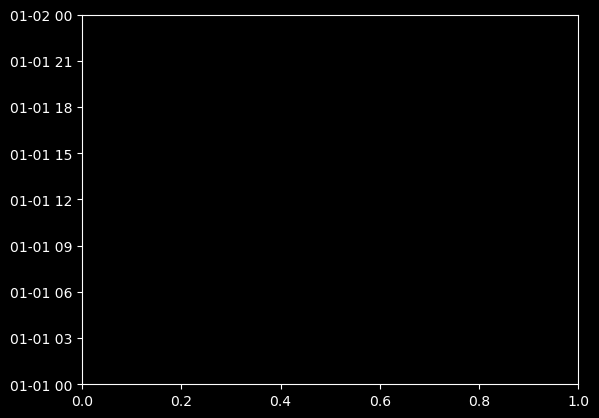

In [85]:
plt.bar(Xs, dates, 10)
# plt.axis(["20230101", last_date, min(Xs), max(Xs)])

### Best to set the 'date' column as the index!!

In [141]:
df.set_index('DATE', inplace=True)

> Some pandas magic to take the mean per month:

In [142]:
df_monthly = df.resample('M').mean()
df_monthly

,PRCP,TAVG
DATE,,
2023-01-31,0.115806,41.322581
2023-02-28,0.018929,42.571429
2023-03-31,0.156452,45.612903
2023-04-30,0.090667,48.166667
2023-05-31,0.061935,57.129032
2023-06-30,0.002778,68.388889


> `resample()` has a couple of tricks, especially for time series.
>>
‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ are `offset aliases` and refer to Monthly, Annual... Weekly. It helps to do `frequency conversion`.

see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

Text(0.5, 0, 'month')

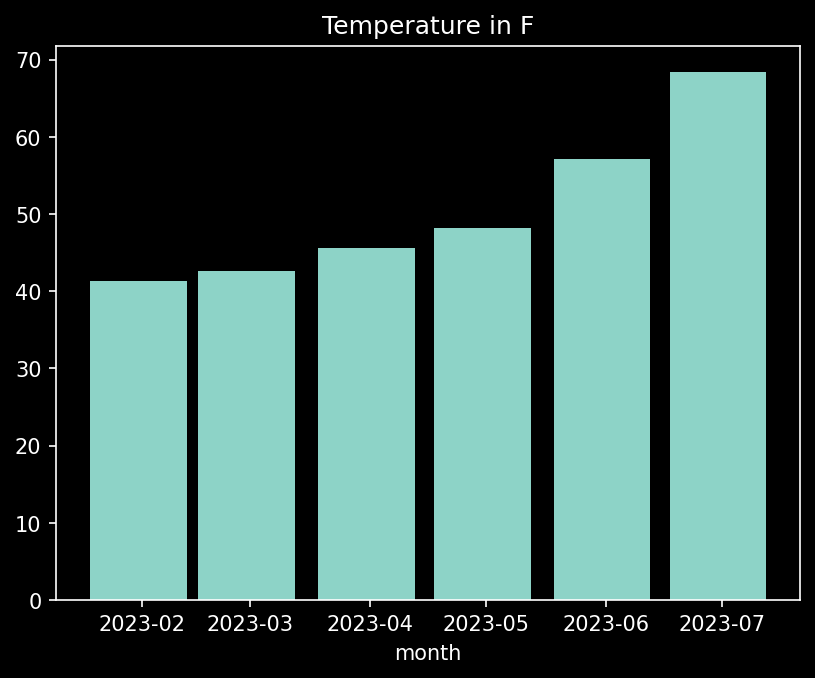

In [159]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.bar(df_monthly.index, df_monthly['TAVG'], 25)  # Plots the monthly average 'value' over time

plt.title('Temperature in F')
plt.xlabel('month')

# Aside: updating pandas and dealing with environment mess

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
# !pip freeze
# !pip freeze > requirements.txt

In [1]:
# !conda list

In [4]:
!conda env export > environment.yml

Sure, here is a sample exercise that utilizes both pandas and matplotlib.

# **Exercise: Analysis of Global COVID-19 Data**

Objective: Use pandas and matplotlib to analyze and visualize COVID-19 data.

Steps:

1. Download the latest COVID-19 data from the Johns Hopkins University GitHub repository: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

   The specific file you need is time_series_covid19_confirmed_global.csv.

2. Load the data into a pandas DataFrame.

3. Clean the data if necessary. For example, you might need to rename columns, handle missing values, etc.

4. Calculate the total number of confirmed cases for each country. Note that for some countries, the data is broken down by province/state, so you will need to sum up all the values for each country.

5. Generate a bar plot that shows the 10 countries with the highest total number of confirmed cases. Use the country names as the labels on the x-axis and the total number of confirmed cases as the values on the y-axis.

6. Generate a line plot that shows the number of confirmed cases over time for the world's three most affected countries.

Hints:

- Use the `pd.read_csv()` function to load the data into a DataFrame.

- Use the `groupby()` and `sum()` functions in pandas to calculate the total number of confirmed cases for each country.

- Use the `plot.bar()` function in pandas to generate the bar plot.

- Use the `plot()` function in pandas to generate the line plot.

Requirements:

- Your solution should include all necessary data loading, cleaning, manipulation, and visualization code.
- Your plots should include a title and labels for the x and y axes.

This exercise will test your ability to manipulate data using pandas and create meaningful visualizations using matplotlib. It will also give you a chance to work with real-world data that is updated on a daily basis.

In [3]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [39]:
df.shape

(289, 1147)

In [40]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

In [25]:
nulls = df.isnull().sum()
nulls

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [41]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [42]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [172]:
df.columns[-30:-10] # was 10 time UK

Index(['Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan*', 'Tajikistan',
       'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'US', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [150]:
df[df['Country/Region'].isin(['United Kingdom'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
264,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3904,3904,3904,3904,3904,3904,3904,3904,3904,3904
265,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,18799,18814,18814,18814,18814,18814,18814,18814,18828,18828
266,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305
267,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,31472,31472,31472,31472,31472,31472,31472,31472,31472,31472
268,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930
270,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,20423,20423,20423,20433,20433,20433,20433,20433,20433,20433
271,Guernsey,United Kingdom,49.448196,-2.589490,0,0,0,0,0,0,...,34867,34929,34929,34929,34929,34929,34929,34929,34991,34991
272,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,38008,38008,38008,38008,38008,38008,38008,38008,38008,38008
273,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,66391,66391,66391,66391,66391,66391,66391,66391,66391,66391


In [255]:
df['Country/Region'].nunique() # to compare with the number of countries

KeyError: 'Country/Region'

In [153]:
df = df.groupby('Country/Region').sum() # to get rid of split-up countries
df

C:\Users\johan\AppData\Local\Temp\ipykernel_7300\1015555835.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Country/Region').sum() # to get rid of split-up countries


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [160]:
df = df.drop([
    # 'Province/State', 
    'Lat', 'Long'], axis=1) 

In [135]:
df = df.set_index('Country/Region')

In [164]:
df = df.T
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/23,209390.0,334427.0,271477.0,47875.0,105277.0,11.0,9106.0,10044125.0,446819.0,11385534.0,...,1034303.0,251071.0,12014.0,552051.0,11526966.0,703228.0,535.0,11945.0,343135.0,264127.0
3/6/23,209406.0,334427.0,271477.0,47875.0,105277.0,11.0,9106.0,10044957.0,446819.0,11385534.0,...,1034303.0,251071.0,12014.0,552125.0,11526966.0,703228.0,535.0,11945.0,343135.0,264127.0
3/7/23,209436.0,334427.0,271490.0,47875.0,105277.0,11.0,9106.0,10044957.0,446819.0,11385534.0,...,1034303.0,251071.0,12014.0,552157.0,11526986.0,703228.0,535.0,11945.0,343135.0,264127.0
3/8/23,209451.0,334443.0,271494.0,47890.0,105288.0,11.0,9106.0,10044957.0,447308.0,11385534.0,...,1034303.0,251247.0,12014.0,552157.0,11526994.0,703228.0,535.0,11945.0,343135.0,264276.0


In [167]:
df.index = df.index.astype('datetime64[ns]')

In [190]:
df['Belgium'][100:-100]

2020-05-01      49032.0
2020-05-02      49517.0
2020-05-03      49906.0
2020-05-04      50267.0
2020-05-05      50509.0
                ...    
2022-11-25    4633112.0
2022-11-26    4633112.0
2022-11-27    4633112.0
2022-11-28    4636264.0
2022-11-29    4636264.0
Name: Belgium, Length: 943, dtype: float64

In [193]:
df['20210101':'20230601']['Belarus'] # note that the index splice can happen alongside the columns

2021-01-01    196223.0
2021-01-02    198125.0
2021-01-03    199962.0
2021-01-04    201831.0
2021-01-05    203104.0
                ...   
2023-03-05    994037.0
2023-03-06    994037.0
2023-03-07    994037.0
2023-03-08    994037.0
2023-03-09    994037.0
Name: Belarus, Length: 798, dtype: float64

<Axes: >

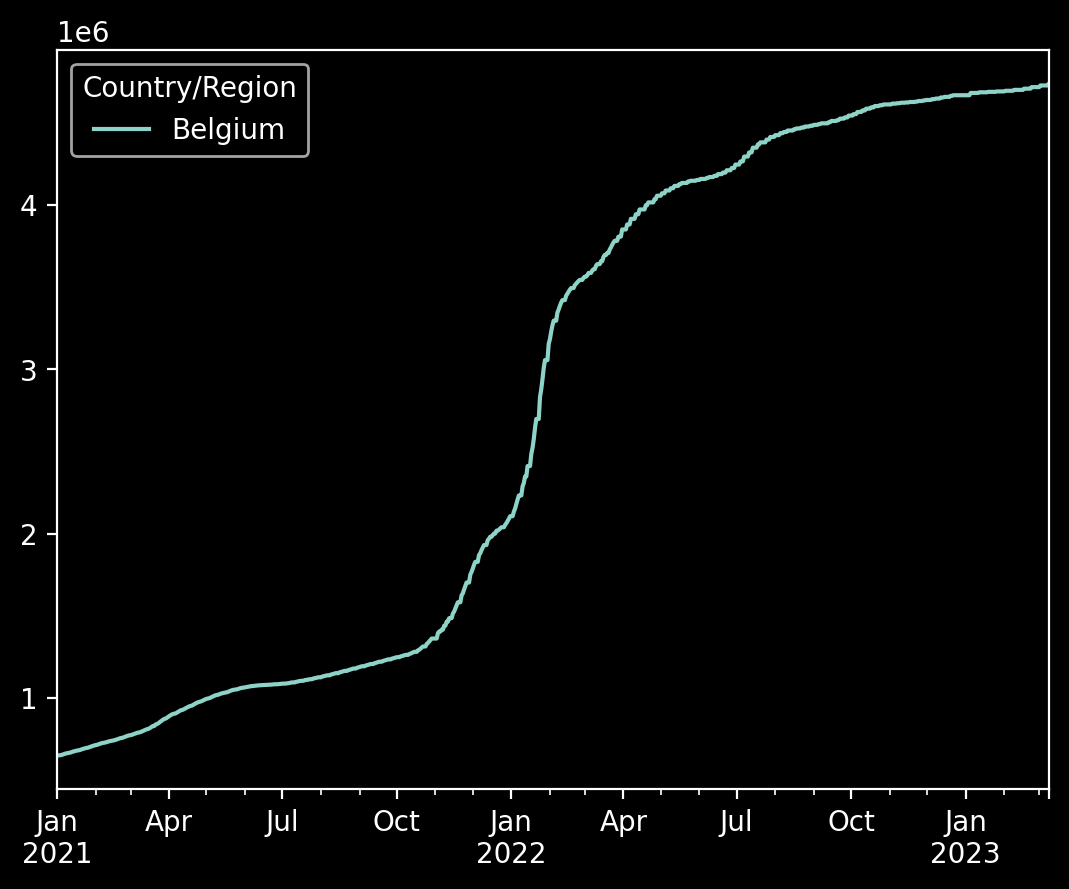

In [168]:
peak = df.loc['20210101':'20230601',['Belgium']]
peak.plot()

Zooming in on the fast increase in Belgium. pct_change computes the percentage change from the immediately previous row. periods= or freq= 

In [252]:
peak['pct_change'] = peak['Belgium'].pct_change(freq='w')
# peak['diff'] = peak['Belgium'].diff(periods=5) # takes difference with l
# peak['20220101':'20220301'].resample('W').mean()

In [228]:
# peak = peak.drop('pct_change', axis=1) # to try again, now with freq specified
peak

Country/Region,Belgium,diff,pct_change
2021-01-01,648289.0,NaN,NaN
2021-01-02,649169.0,NaN,NaN
2021-01-03,650011.0,NaN,0.002656
2021-01-04,650887.0,NaN,NaN
2021-01-05,652735.0,NaN,NaN
...,...,...,...
2023-03-05,4727795.0,10140.0,0.002149
2023-03-06,4727795.0,10140.0,NaN
2023-03-07,4727795.0,0.0,NaN
2023-03-08,4727795.0,0.0,NaN


<Axes: >

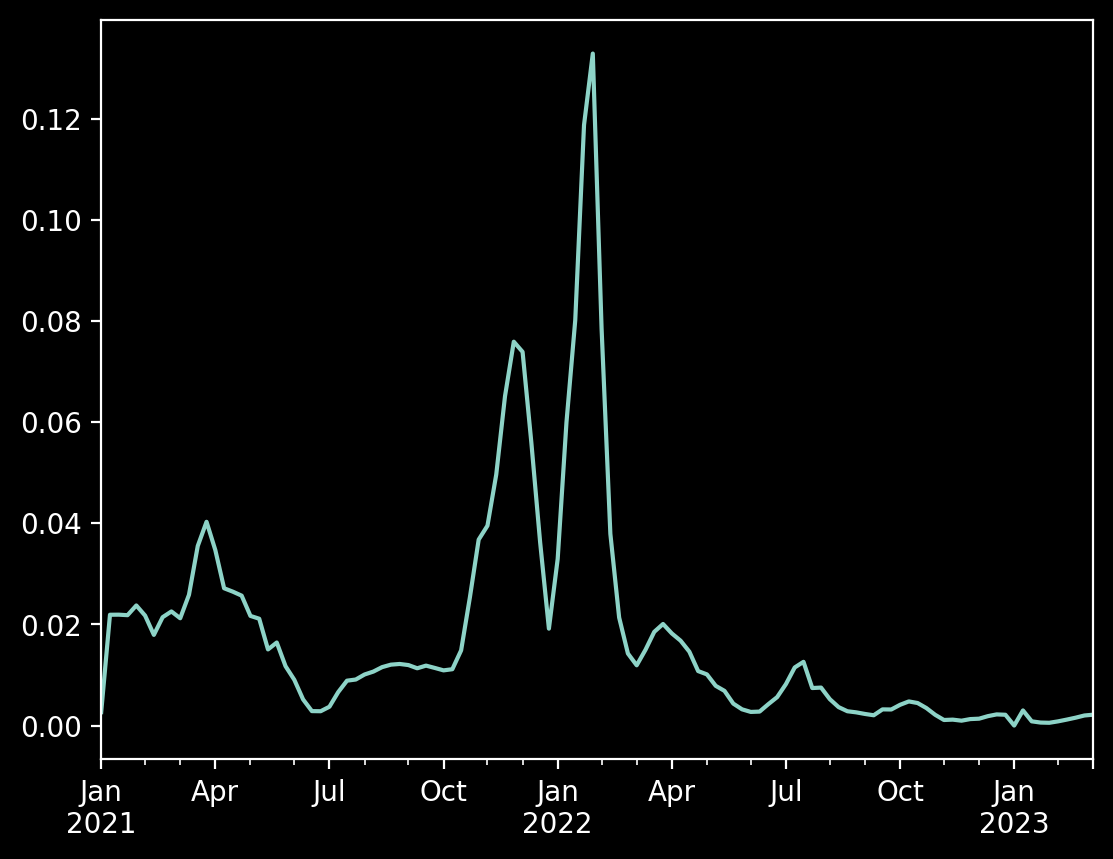

In [229]:
s = peak['pct_change'].dropna() # to filter by the freq = week
s.plot()

The following returns the index (date) for the max value (of pct change). It then takes the loc of that.

In [253]:
peak.loc[peak['pct_change'].idxmax()]

Country/Region
Belgium       3.055925e+06
diff          1.777130e+05
pct_change    1.329827e-01
Name: 2022-01-30 00:00:00, dtype: float64

In [260]:
peak.groupby(peak.index)['pct_change'] \
    .max() \
    .sort_values(ascending=False) \
    .head()

2022-01-30    0.132983
2022-01-23    0.118847
2022-01-16    0.080229
2022-02-06    0.078573
2021-11-28    0.075961
Name: pct_change, dtype: float64

In [169]:
df.resample('Y').mean()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-12-31,24642.756522,10804.475362,30676.449275,1979.194203,3893.942029,0.000000,66.382609,4.299606e+05,42182.831884,1.475717e+04,...,2.208852e+03,28069.098551,0.150725,35652.828986,6.357594e+02,25371.594203,0.00000,1108.133333,7054.733333,3873.284058
2021-12-31,108269.534247,140016.824658,156638.323288,13929.671233,40540.123288,0.542466,1888.871233,3.945784e+06,236278.128767,7.790034e+04,...,2.710320e+05,127054.989041,3.747945,272695.668493,3.713406e+05,317738.879452,0.00000,6586.156164,144090.490411,82371.060274
2022-12-31,185708.394521,295903.216438,264471.432877,42541.747945,100638.567123,11.000000,8160.841096,9.192436e+06,422877.254795,7.416617e+06,...,9.018088e+05,238481.695890,8121.268493,525599.635616,9.301463e+06,657524.112329,487.89589,11728.553425,322717.786301,249761.435616
2023-12-31,208599.617647,334180.808824,271370.794118,47832.867647,105170.161765,11.000000,9106.000000,1.002495e+07,446272.514706,1.129816e+07,...,1.030517e+06,250544.294118,12013.941176,551485.544118,1.152645e+07,703228.000000,535.00000,11945.000000,340217.338235,262068.264706


## Top 10

Broken down, the following is:
- take the last index (ie date)
- sort values
- upside down
- take the top 10

In [174]:
top10 = df.iloc[-1].sort_values(ascending=False)[:9]

top10.index

Index(['US', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'Korea, South',
       'Italy', 'United Kingdom'],
      dtype='object', name='Country/Region')

Text(0.5, 1.0, 'Covid deaths')

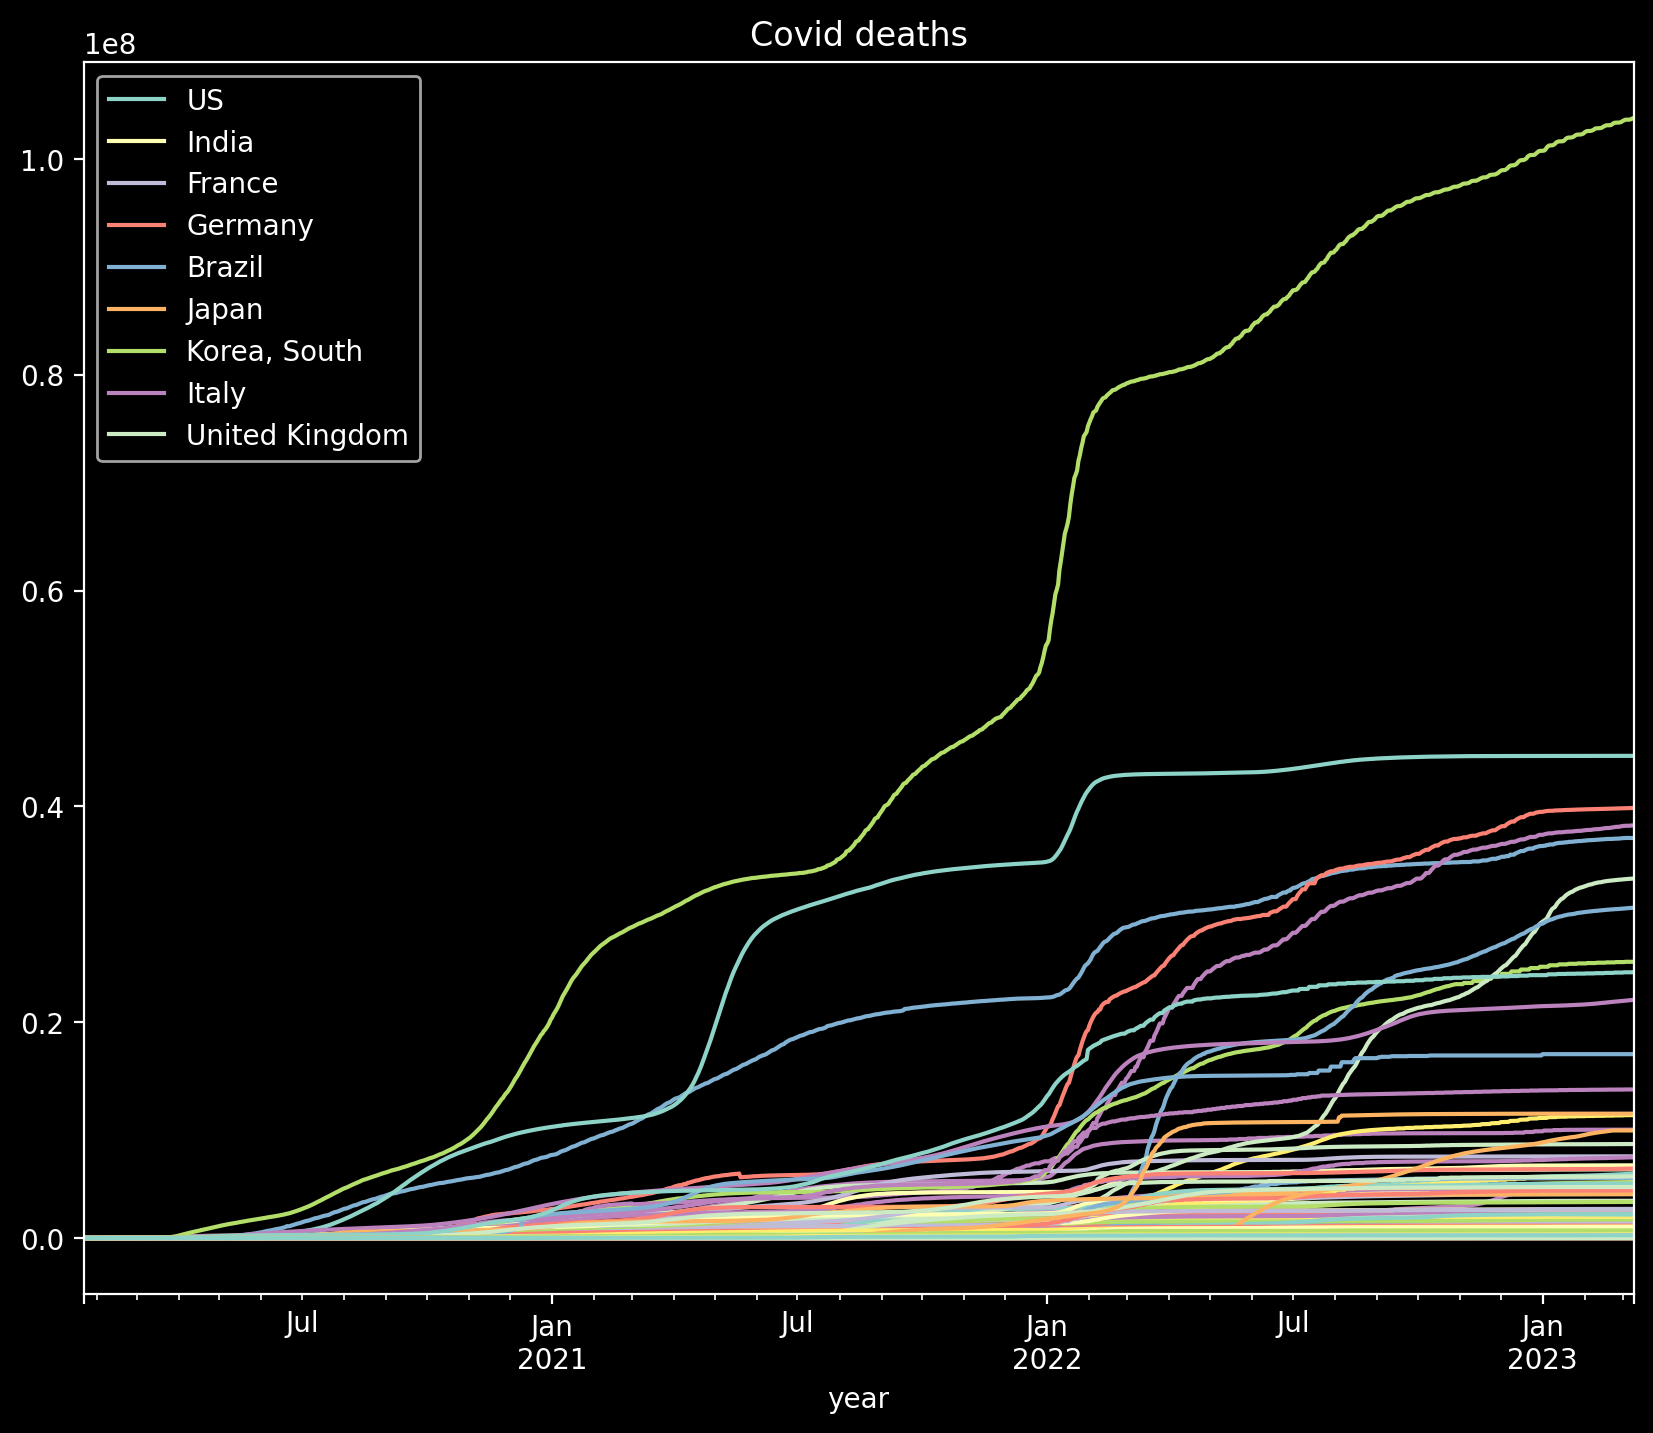

In [182]:
import matplotlib.pyplot as plt

plt.close("all")

# plt.figure(figsize=[10,8])
df.plot(figsize=(10, 8))
plt.legend(top10.index)
plt.xlabel('year')
plt.title('Covid deaths')

<Figure size 1000x800 with 0 Axes>

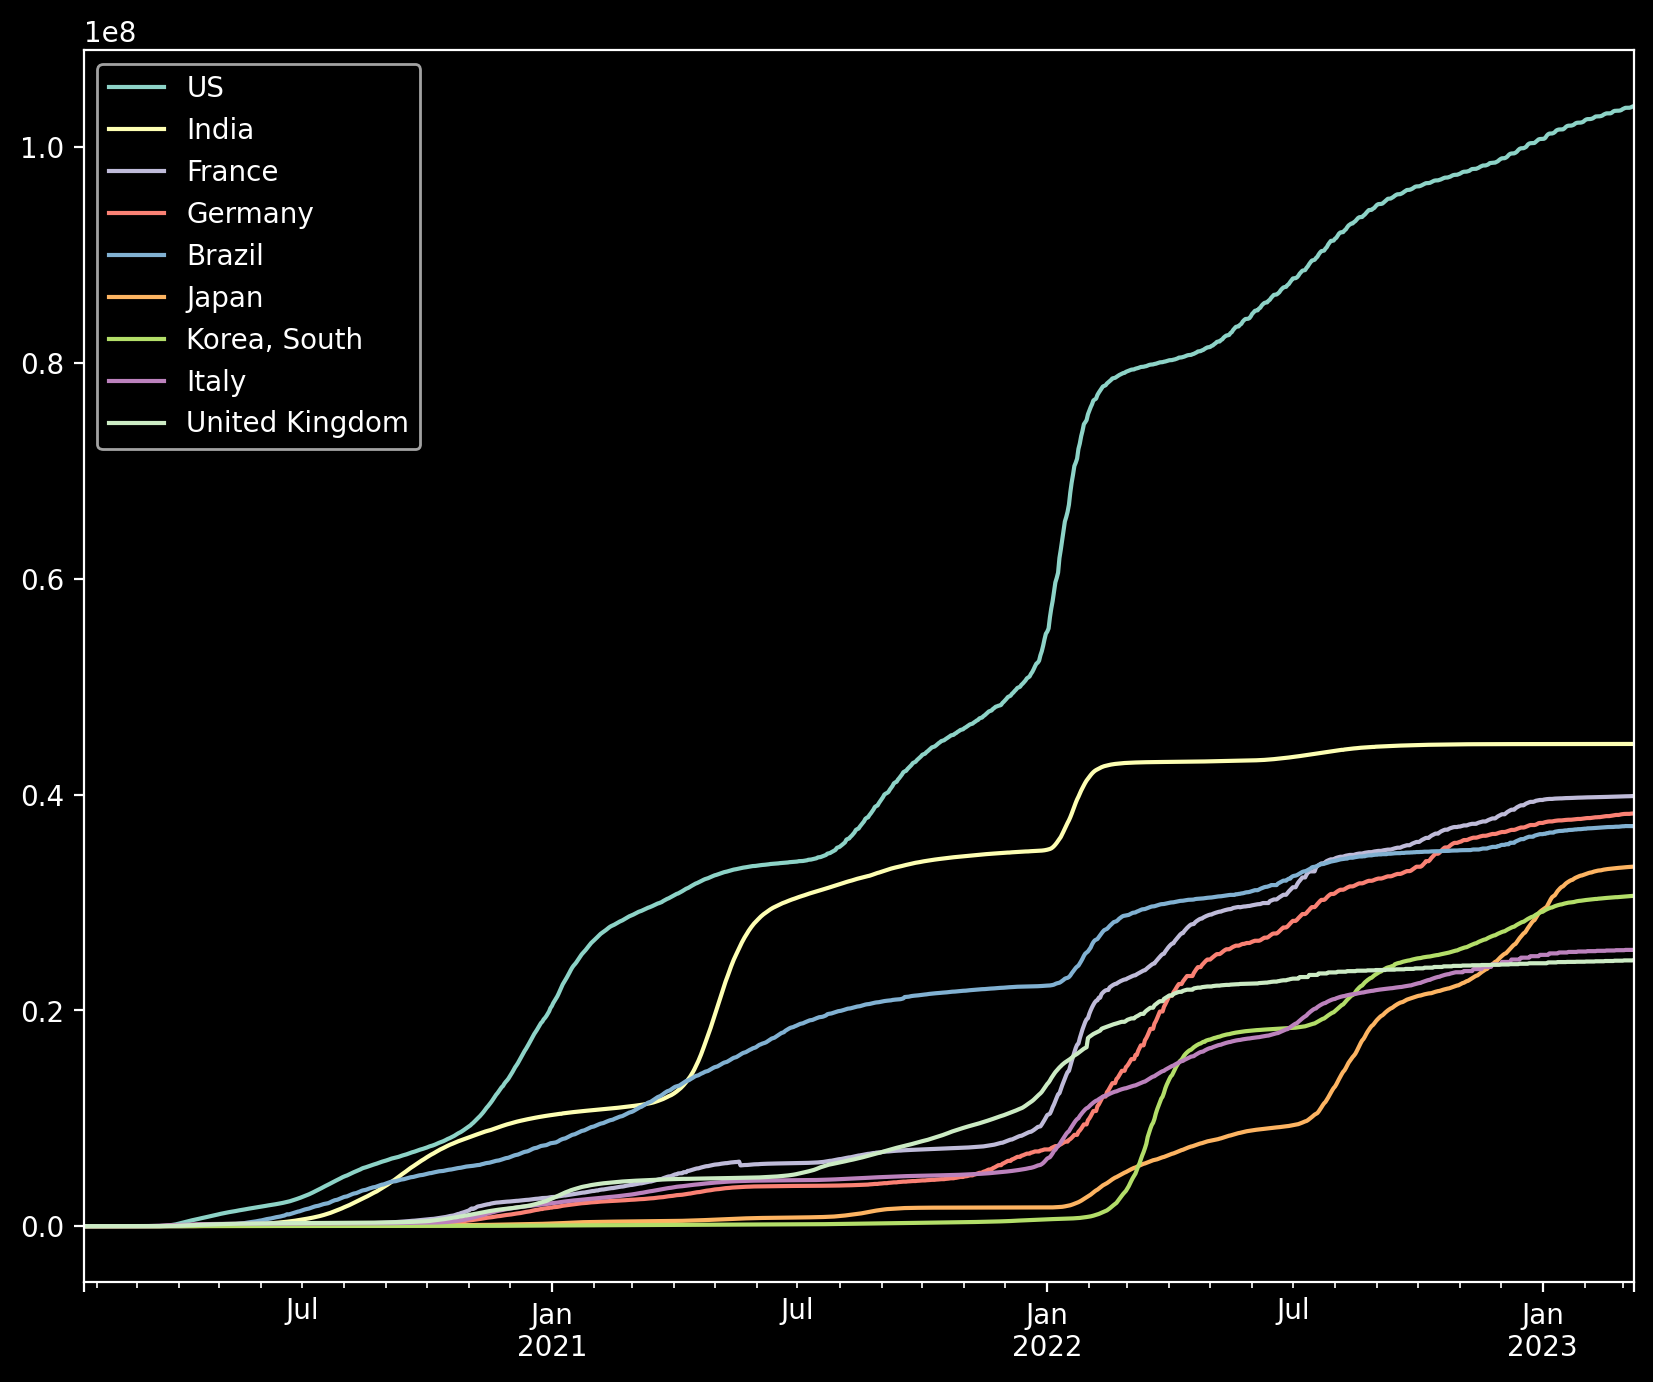

In [180]:
df2 = df[top10.index]
df2.plot(figsize=(10, 8))
plt.legend(top10.index)
plt.show()

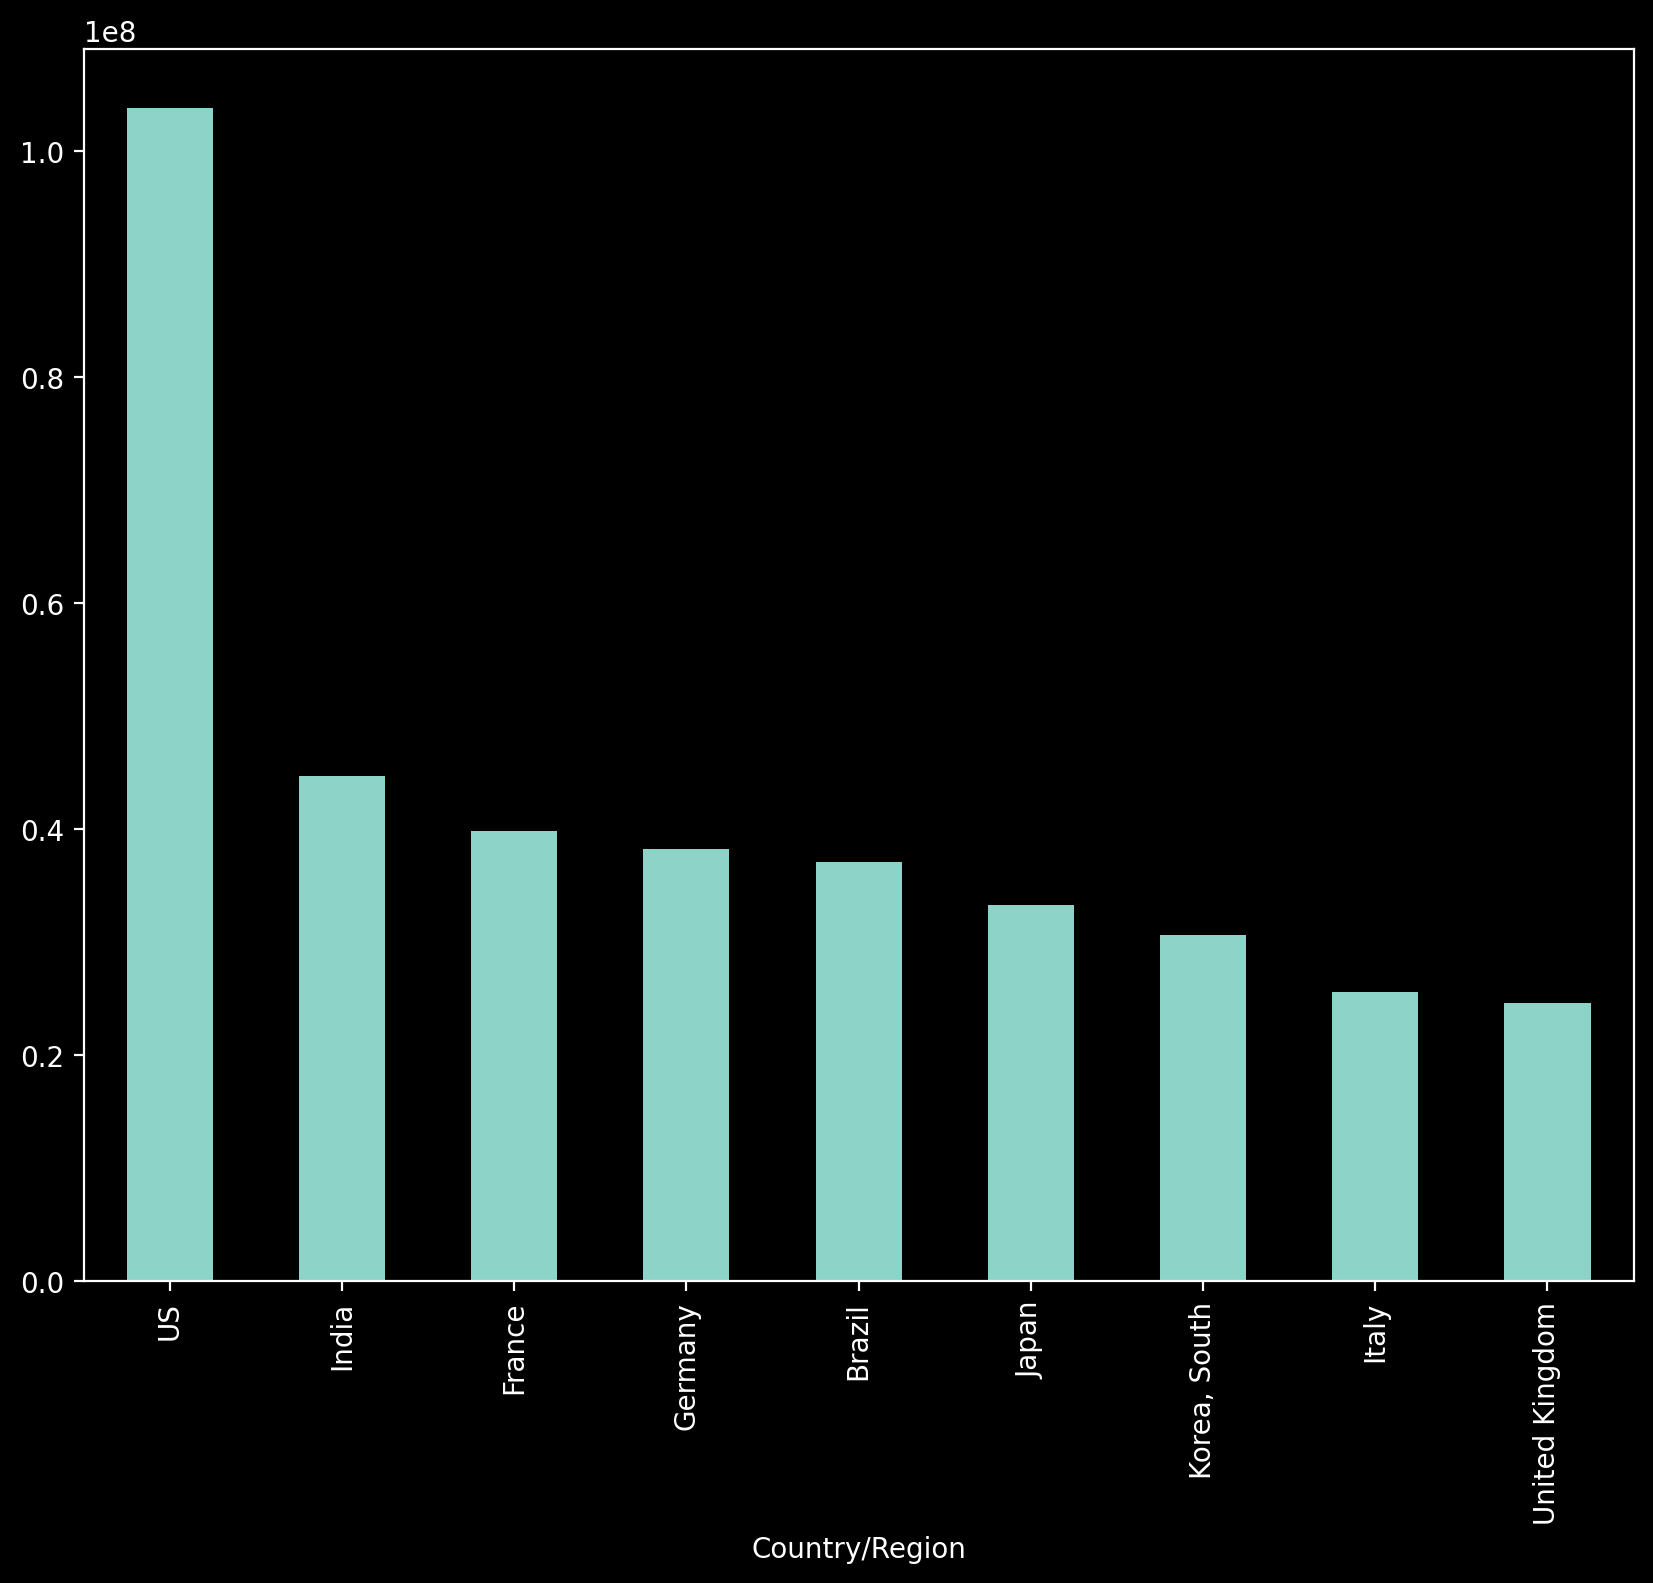

In [181]:
df2.iloc[-1].plot(kind='bar',figsize=(10, 8))
plt.show()